In [1]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

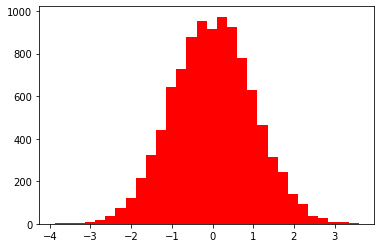

In [4]:
sample = normal(size=10000) # Generador aleatorio basado en la distribución normal
pyplot.hist(sample, bins=30,color="red") 
pyplot.show()

## Estimación paramétrica

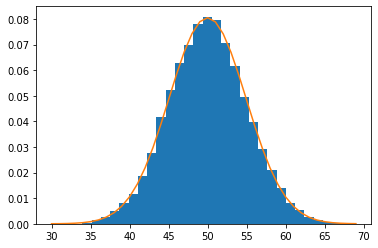

In [13]:
sample=normal(loc=50,scale=5,size=10000) #Loc:mu=50, scale:sigma=5
mu=sample.mean()
sigma=sample.std()
dist=norm(mu,sigma)
values=[value for value in range (30,70)]
probabilidades= [dist.pdf(value) for value in values]
pyplot.hist(sample,bins=30,density=True)
pyplot.plot(values, probabilidades) #Función teórica
pyplot.show()

# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html


In [16]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2)) #hstack:juntar datos dentro de uno solo.

#Método de Kernel
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample=sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(algorithm='auto', atol=0, bandwidth=2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

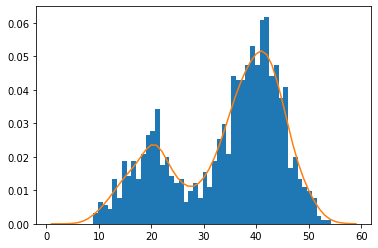

In [19]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

pyplot.hist(sample,bins=50,density=True)
pyplot.plot(values,probabilities) #Distribución teórica Kernel
pyplot.show()